## Introduction

In this report, we have been given the Physical Activity Monitoring Dataset which has data on 18 different physical activities from 9 distinct subjects collected by wearing 3 inertial measurement units(IMU) and a heart rate monitor. The data of each individual is given in a separate text file with 54 attributes. The main objective of this report is:
	
*	To thoroughly analyse the data after handling the dirty data and produce some actionable insight that can be used to determine the amount and type of physical activity performed.


*	To produce a hypothesis that tests the relationship among a pair of attributes.


*	To develop and test a model that utilizes multiple attributes for prediction.


In [1]:
#Doing necessary imports
import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
import math
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
pd.options.mode.chained_assignment = None
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.model_selection as cross_validation

## Loading data

We are loading the protocol data which is performed by almost all the subjects from the text file into a pandas data frame.

In [2]:
#subject ID are loaded in this list
subjectID = [101,102,103,104,105,106,107,108,109]

#this dictionary has all the activities and its ID's stored as a key value pairs
activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

#this dictionary contains the weight of subjects respective to thier subject ID's
subject_weights={101:83,102:78,103:92,104:95,105:73,106:69,107:86,108:87,109:65}

#this dictionary has the metabolic equivalent of the tasks associated with their respective activity ID
MET_values = {1: 1,
              2: 1.8,
              3: 1.8,
              4: 3.5,
              5: 7.5,
              6: 4,
              7: 5.5,
              12:8,
              13: 3,
              16: 3.5,
              17: 2.3,
              24: 9}


In [3]:
#this list contains the data of subjects in text files 
List_of_Subjects=['Dataset/Protocol/subject101.dat',
                  'Dataset/Protocol/subject102.dat',
                  'Dataset/Protocol/subject103.dat',
                  'Dataset/Protocol/subject104.dat',
                  'Dataset/Protocol/subject105.dat',
                  'Dataset/Protocol/subject106.dat',
                  'Dataset/Protocol/subject107.dat',
                  'Dataset/Protocol/subject108.dat',
                  'Dataset/Protocol/subject109.dat']

# Column names for the attributes are loaded in the below lists

IMUhand = ['Temperature_hand', 
           '3D_hand_Accl_16_1', '3D_hand_Accl_16_2', '3D_hand_Accl_16_3', 
           '3D_hand_Accl_6_1', '3D_hand_Accl_6_2', '3D_hand_Accl_6_3', 
           '3D_handGyro_1', '3D_handGyro_2', '3D_handGyro_3', 
           '3D_handmagneto_1', '3D_handmagneto_2', '3D_handmagneto_3',
           'Orientation_hand_1', 'Orientation_hand_2', 'Orientation_hand_3', 'Orientation_hand_4']

IMUchest = ['Temperature_chest', 
           '3D_chest_Accl_16_1', '3D_chest_Accl_16_2', '3D_chest_Accl_16_3', 
           '3D_chest_Accl_6_1', '3D_chest_Accl_6_2', '3D_chest_Accl_6_3', 
           '3D_chestGyro_1', '3D_chestGyro_2', '3D_chestGyro_3', 
           '3D_chestmagneto_1', '3D_chestmagneto_2', '3D_chestmagneto_3',
           'Orientation_chest_1', 'Orientation_chest_2', 'Orientation_chest_3', 'Orientation_chest_4']

IMUankle = ['Temperature_ankle', 
           '3D_ankle_Accl_16_1', '3D_ankle_Accl_16_2', '3D_ankle_Accl_16_3', 
           '3D_ankle_Accl_6_1', '3D_ankle_Accl_6_2', '3D_ankle_Accl_6_3', 
           '3D_ankleGyro_1', '3D_ankleGyro_2', '3D_ankleGyro_3', 
           '3D_anklemagneto_1', '3D_anklemagneto_2', '3D_anklemagneto_3',
           'Orientation_ankle_1', 'Orientation_ankle_2', 'Orientation_ankle_3', 'Orientation_ankle_4']

#concatenate all the lists above to get the column names of the 54 attributes
Column_names=["timestamp", "activityID","heartrate"]+IMUhand+IMUchest+IMUankle

len(Column_names)

54

The below representation of `Physc_Act_Data` shows the loaded pandas data frame with all the attributes of the subjects.

In [4]:
Physc_Act_Data = pd.DataFrame()
for file in List_of_Subjects:
    data_given = pd.read_table(file, header=None, sep='\s+')
    data_given.columns = Column_names
    data_given['subject_id'] = int("10"+file[-5])
    Physc_Act_Data = Physc_Act_Data.append(data_given, ignore_index=True)

Physc_Act_Data.reset_index(drop=True, inplace=True)
Physc_Act_Data

C:\Users\dell\AppData\Local\Temp\ipykernel_20340\891215994.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Physc_Act_Data = Physc_Act_Data.append(data_given, ignore_index=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_20340\891215994.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Physc_Act_Data = Physc_Act_Data.append(data_given, ignore_index=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_20340\891215994.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Physc_Act_Data = Physc_Act_Data.append(data_given, ignore_index=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_20340\891215994.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

,timestamp,activityID,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,Orientation_ankle_1,Orientation_ankle_2,Orientation_ankle_3,Orientation_ankle_4,subject_id
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,101
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,101
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,101
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,101
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,109
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,109
2872530,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,109
2872531,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208,109


From the above, we can see that there are Nan values in the data and columns and rows like orientation and transient activities that are not required for the analysis are present. So, we have to clean the data.

## Data cleaning

Data cleaning is a crucial step to be performed before the analysis on the dataset as the null values and unwanted rows and columns may create anomalies in the derived results. The orientation columns and transient activities row are not required in the above dataset. So, we are dropping those and interpolating the null values.

The below function `dataCleaning` performs the data cleaning for a given DataFrame.

In [5]:
def dataCleaning(dataCollection):
    
        # removing the orientation columns that are not required
        dataCollection = dataCollection.drop(['Orientation_hand_1', 'Orientation_hand_2', 'Orientation_hand_3', 'Orientation_hand_4',
                                             'Orientation_chest_1', 'Orientation_chest_2', 'Orientation_chest_3', 'Orientation_chest_4',
                                             'Orientation_ankle_1', 'Orientation_ankle_2', 'Orientation_ankle_3', 'Orientation_ankle_4'],
                                             axis = 1)  
        
        #Dropping the rows of transient activities
        dataCollection = dataCollection.drop(dataCollection[dataCollection.activityID == 0].index) 
        
        #removal of non numeric data in cells
        dataCollection = dataCollection.apply(pd.to_numeric, errors = 'coerce') 
        
        #removing NaN value cells by performing interpolation
        dataCollection = dataCollection.interpolate(limit_direction='both') 
        
        return dataCollection


In [6]:
#storing the cleaned data in a variable
Cleaned_Data = dataCleaning(Physc_Act_Data)
Cleaned_Data.reset_index(drop = True, inplace = True)

#having a overlook on the cleaned data
Cleaned_Data

,timestamp,activityID,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankle_Accl_6_1,3D_ankle_Accl_6_2,3D_ankle_Accl_6_3,3D_ankleGyro_1,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,subject_id
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,101
1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.319700,-58.365600,101
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,101
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,101
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942867,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,...,9.41274,-2.26922,-1.759580,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,109
1942868,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,...,9.33733,-2.23908,-1.834950,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134,109
1942869,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,...,9.32243,-2.23905,-1.804610,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,109
1942870,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,...,9.38220,-2.26938,-1.880500,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,109


In [7]:
#double checking the presence of null values
Cleaned_Data.isnull().sum()

timestamp             0
activityID            0
heartrate             0
Temperature_hand      0
3D_hand_Accl_16_1     0
3D_hand_Accl_16_2     0
3D_hand_Accl_16_3     0
3D_hand_Accl_6_1      0
3D_hand_Accl_6_2      0
3D_hand_Accl_6_3      0
3D_handGyro_1         0
3D_handGyro_2         0
3D_handGyro_3         0
3D_handmagneto_1      0
3D_handmagneto_2      0
3D_handmagneto_3      0
Temperature_chest     0
3D_chest_Accl_16_1    0
3D_chest_Accl_16_2    0
3D_chest_Accl_16_3    0
3D_chest_Accl_6_1     0
3D_chest_Accl_6_2     0
3D_chest_Accl_6_3     0
3D_chestGyro_1        0
3D_chestGyro_2        0
3D_chestGyro_3        0
3D_chestmagneto_1     0
3D_chestmagneto_2     0
3D_chestmagneto_3     0
Temperature_ankle     0
3D_ankle_Accl_16_1    0
3D_ankle_Accl_16_2    0
3D_ankle_Accl_16_3    0
3D_ankle_Accl_6_1     0
3D_ankle_Accl_6_2     0
3D_ankle_Accl_6_3     0
3D_ankleGyro_1        0
3D_ankleGyro_2        0
3D_ankleGyro_3        0
3D_anklemagneto_1     0
3D_anklemagneto_2     0
3D_anklemagneto_

The above resuls of the dataframe `Cleaned_Data` shows that the data is clean and ready to perform Exploratory Data Analysis.

## Exploratory Data Analysis

We are first looking into the amount of data we have on each activity for the analysis.

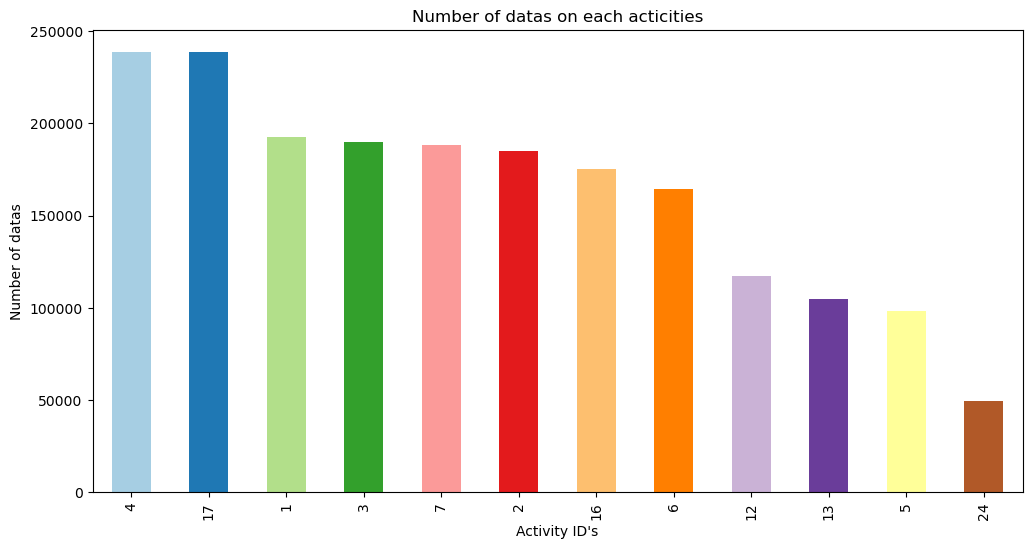

In [8]:
size = range(len(Cleaned_Data))
Cleaned_Data['activityID'].value_counts().plot(kind = "bar",figsize = (12,6),color=plt.cm.Paired(size))
plt.ylabel('Number of datas')
plt.xlabel("Activity ID's")
plt.title('Number of datas on each acticities')
plt.show()

The above representation shows the amount of data collected on 12 different activities performed by each subject as described on `DataCollectionProtocol.pdf`.

#### Splitting the data

The given data is split into training and testing data. We do all the analysis and modelling based on the training data without involving the testing data. By doing this the testing data will not influence the model or the analysis and can be very much helpful in testing the model’s accuracy.

We are taking 80 percent of the data given for training and leaving the rest for testing.

In [9]:
#Splitting and storing the training data in a variable
training_dataset = Cleaned_Data.sample(frac=0.8, random_state=1)
training_dataset.reset_index(drop = True, inplace = True)

#Droping the training data and storing the testing data in a variable
testing_dataset = Cleaned_Data.drop(training_dataset.index)

The mean, standard deviation and the other descriptive statistic features of the training dataset are given by the inbuilt function `DataFrame.describe()`.

In [10]:
training_dataset.describe()

,timestamp,activityID,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankle_Accl_6_1,3D_ankle_Accl_6_2,3D_ankle_Accl_6_3,3D_ankleGyro_1,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,subject_id
count,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,...,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06
mean,1.705049e+03,8.080534e+00,1.074758e+02,3.275138e+01,-4.953526e+00,3.581113e+00,3.603514e+00,-4.886385e+00,3.570863e+00,3.787763e+00,...,9.374706e+00,-4.445267e-02,-2.175620e+00,1.027736e-02,-3.649406e-02,5.607242e-03,-3.157962e+01,1.394841e+00,1.725137e+01,1.045666e+02
std,1.093592e+03,6.175064e+00,2.699031e+01,1.794207e+00,6.239143e+00,6.886169e+00,3.958145e+00,6.245060e+00,6.585066e+00,3.945398e+00,...,6.067489e+00,7.183548e+00,3.475628e+00,1.126197e+00,6.380780e-01,2.011908e+00,1.834688e+01,2.168353e+01,1.969368e+01,2.333375e+00
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,...,-6.114200e+01,-6.190350e+01,-6.231480e+01,-1.416200e+01,-1.304010e+01,-1.401960e+01,-1.726240e+02,-1.379080e+02,-1.027160e+02,1.010000e+02
25%,7.442925e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.970020e+00,1.057830e+00,1.162090e+00,-8.867070e+00,1.055562e+00,1.365070e+00,...,8.396590e+00,-2.073120e+00,-3.399390e+00,-2.081647e-01,-1.066462e-01,-4.416657e-01,-4.170160e+01,-1.246927e+01,3.799632e+00,1.020000e+02
50%,1.480090e+03,6.000000e+00,1.040000e+02,3.312500e+01,-5.449130e+00,3.525300e+00,3.432840e+00,-5.377104e+00,3.566820e+00,3.663470e+00,...,9.550020e+00,-2.252810e-01,-1.993145e+00,4.636280e-03,-3.977450e-03,-2.336400e-03,-3.400060e+01,7.672570e-01,1.876795e+01,1.050000e+02
75%,2.664000e+03,1.300000e+01,1.240000e+02,3.406250e+01,-9.581007e-01,6.450508e+00,6.532445e+00,-9.061720e-01,6.458267e+00,6.778200e+00,...,1.028160e+01,1.920960e+00,-5.958823e-01,1.308070e-01,1.160640e-01,9.121635e-02,-1.789610e+01,1.782927e+01,3.120910e+01,1.070000e+02
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.192340e+01,...,6.196930e+01,6.204900e+01,6.093570e+01,1.742040e+01,1.358820e+01,1.448270e+01,9.155160e+01,9.369920e+01,1.469000e+02,1.090000e+02


The below cell groups the data based on the $activityID$ and $subjectId$, and computes the mean of each attributes of the subject respective to the activities.

In [11]:
#group by activityID and subject_id
df_grouped_act=training_dataset.groupby(['activityID','subject_id']).mean()
df_grouped_act=df_grouped_act.reset_index()

#displaying the grouped dataFrame for reference
display(df_grouped_act)

,activityID,subject_id,timestamp,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,...,3D_ankle_Accl_16_3,3D_ankle_Accl_6_1,3D_ankle_Accl_6_2,3D_ankle_Accl_6_3,3D_ankleGyro_1,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3
0,1,101,174.146564,87.479680,31.289664,4.471500,2.609731,3.772621,4.509462,2.604241,...,-6.919713,0.247069,-5.277725,-6.616363,0.006486,-0.003952,0.001653,-21.484085,34.622999,0.249557
1,1,102,172.450605,79.554556,33.672288,5.755864,2.954673,5.818953,5.972948,2.920963,...,-3.508833,0.386200,-8.654908,-3.097916,0.026467,-0.006292,0.004506,-15.509436,20.988388,-2.370196
2,1,103,276.922733,74.022070,31.310992,6.376225,1.368370,5.518300,6.439280,1.344901,...,0.246590,1.493982,-8.784467,0.670978,0.003108,-0.003123,0.006472,-18.620260,12.788824,-4.617645
3,1,104,190.206398,74.584966,32.720585,3.844414,0.189861,7.807312,3.996040,0.107355,...,0.925875,2.714429,-8.807244,1.450144,0.013002,-0.004698,0.007399,-22.736828,11.999178,-12.244234
4,1,105,223.122926,76.514759,34.819576,0.022193,7.032324,5.793569,0.174038,7.064571,...,-4.117262,0.430491,-8.290776,-3.717238,0.012376,-0.005211,0.008939,-16.356510,21.806501,-4.570598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,24,102,4179.294009,155.993221,28.418005,-2.980993,8.139722,-3.184792,-3.193998,8.162015,...,-1.236601,9.794967,0.841574,-0.893512,0.037578,-0.004658,-0.000987,-35.867828,-7.067807,33.572460
87,24,105,3714.862936,163.537180,33.817690,-5.849454,7.649061,-1.552018,-5.829204,7.693254,...,-3.676476,9.260828,2.374867,-3.267782,0.029259,-0.006019,0.003150,-46.833881,-5.040725,-0.341345
88,24,106,3622.817094,131.675369,27.978448,-2.560957,8.576515,-3.874612,-2.705930,8.527008,...,-2.146650,9.695860,0.391388,-1.609718,0.010029,-0.011249,0.009415,-38.488427,-11.087654,34.577862
89,24,108,3844.272388,174.164070,30.825801,-4.841173,-7.330742,0.962777,-4.977740,-7.432022,...,-3.092307,10.885921,-1.673722,-2.631833,-0.029242,-0.006407,-0.023107,-29.568768,25.411927,26.899327


In [12]:
# adding 'activity_name' column to the dataframe
training_dataset['activity_name']=1
for i in range(len(training_dataset['activityID'])):
    training_dataset['activity_name'][i]=activityIDdict[training_dataset['activityID'][i]]

One of the main goal is to determine the different type of activities performed. So, we are analysing how the attribute 'heartrate' plays a crucial role.

In [13]:
#looking into the training dataset after adding a new column 'activity_name'
training_dataset[['activityID','activity_name','heartrate','3D_chest_Accl_16_3']]

,activityID,activity_name,heartrate,3D_chest_Accl_16_3
0,3,standing,90.000000,-4.345850
1,12,ascending_stairs,167.909091,-4.857240
2,24,rope_jumping,181.000000,-0.949060
3,1,lying,62.000000,9.348880
4,2,sitting,79.000000,0.209544
...,...,...,...,...
1554293,3,standing,103.000000,0.771447
1554294,17,ironing,82.000000,-2.398790
1554295,17,ironing,106.000000,-9.648590
1554296,16,vacuum_cleaning,100.000000,-10.418900


In the below cell,by importing seaborn we have plotted the boxplot for the continous variable(heartrate) to show the mean and skewness obtained during various activities.

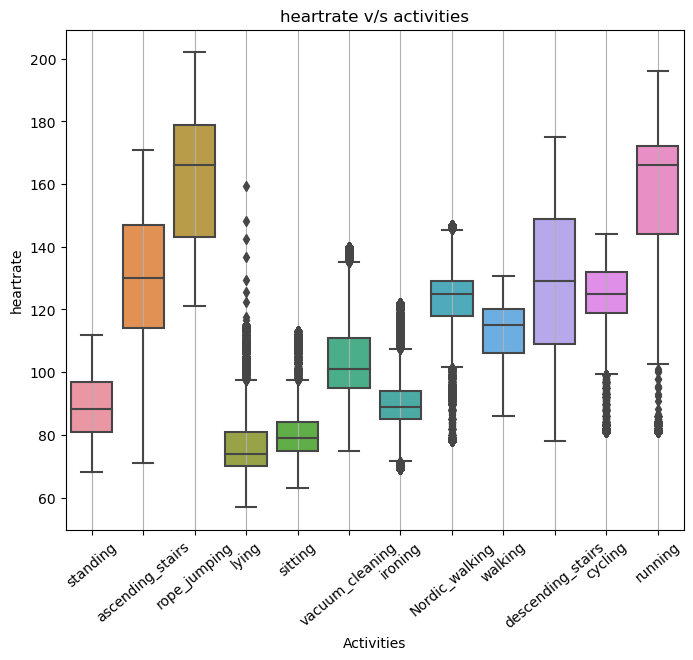

In [14]:
#plotting boxplot using seaborn
import seaborn as sns
plt.figure(figsize=(7,5))
plt.subplots_adjust(2,1,5,2)
plt.subplot(131)
dat1=training_dataset[['activity_name','heartrate']]
plt.xticks(rotation=40)
sns.boxplot(x='activity_name',y='heartrate',data=dat1)
plt.grid(axis='x')
plt.ylabel('heartrate')
plt.xlabel('Activities')
plt.title('heartrate v/s activities')
plt.show()

From the above representation we can say that the rope_jumping and running has the high mean heart rate and we can also observe that the data is negatively skewed for those activities. Whereas the lying and sitting activities has recorded the lowest heart rates.

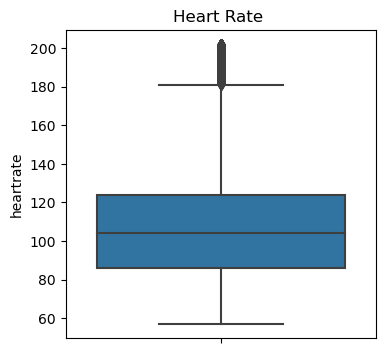

In [15]:
#plotting heart rate
fig, ax = plt.subplots(figsize=(4,4))
plt.title("Heart Rate ")
ax = sns.boxplot(y=training_dataset["heartrate"])

In general with all the activities data combined, the heartrate is positively skewed with most values around 125 and 180, and the lower quartile and upper quartile lying around 85 and 125 respectively, the minimum heart rate recorded is nearly 57 and the median is around 107. We can also observe the outliers lying from 180 to 205.

In [16]:
#grouping the dataframe based on the activities performed
df_grouped=training_dataset.groupby(['activityID']).mean()
df_grouped=df_grouped.reset_index()

df_grouped['activity_name']=1
for i in range(len(df_grouped['activityID'])):
    df_grouped['activity_name'][i]=activityIDdict[df_grouped['activityID'][i]]

#this dataFrame representation shows the mean values of the attributes for each individual activities    
df_grouped

,activityID,timestamp,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankle_Accl_6_2,3D_ankle_Accl_6_3,3D_ankleGyro_1,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,subject_id,activity_name
0,1,205.857892,75.525601,32.729169,3.674633,2.068154,6.365044,3.786752,2.039768,6.585807,...,-6.227147,-3.317766,0.010899,-0.005854,0.006017,-17.928284,20.569159,0.138966,104.487353,lying
1,2,506.519909,80.009729,33.261016,-1.379082,4.290657,5.172076,-1.251081,4.290106,5.381601,...,-0.212729,-2.086376,0.006566,-0.005311,0.004863,-22.535003,2.524832,21.128472,104.311487,sitting
2,3,733.281948,88.546969,33.637713,-7.080367,3.221373,2.669624,-6.943848,3.264553,2.887457,...,-0.745581,-1.644225,0.003960,-0.004463,0.004515,-22.602733,-0.600303,24.421361,104.594827,standing
3,4,2429.959533,112.785781,32.304002,-10.095963,2.515502,1.916733,-10.088836,2.544901,2.086974,...,0.630345,-2.690418,-0.006302,-0.113482,0.002218,-37.007449,-0.649424,15.774845,104.625846,walking
4,5,3445.395371,156.590133,30.822686,-6.472884,6.728023,0.292878,-6.583868,6.358341,0.391400,...,2.920257,-3.153674,0.005354,-0.098306,-0.034431,-36.513556,-8.191070,13.235695,104.665324,running
5,6,3129.224422,124.873693,31.010305,-5.171269,2.513435,7.115064,-5.171138,2.516658,7.254496,...,2.135793,-1.068498,0.085576,0.038757,0.006948,-38.851252,-6.910864,12.889134,104.698905,cycling
6,7,2903.790803,123.807701,31.530453,-4.731283,5.084085,2.534843,-4.731786,5.070799,2.685644,...,0.872427,-2.911249,-0.007084,-0.141392,-0.004217,-37.364320,-0.664984,14.331455,104.853737,Nordic_walking
7,12,1807.026864,129.530766,33.527093,-8.725221,3.654658,1.595399,-8.636376,3.692711,1.792414,...,1.600604,-2.692378,0.375715,0.132564,-0.016185,-35.671633,-4.863666,13.769343,104.403614,ascending_stairs
8,13,1905.421911,129.097297,33.322391,-6.288045,2.889464,3.631175,-6.189481,2.902107,3.826011,...,1.126166,-2.138895,-0.406462,-0.247176,0.105875,-36.795086,-4.382296,20.268917,104.175092,descending_stairs
9,16,1360.017183,104.198766,34.177905,-7.146482,3.571017,1.911862,-7.017477,3.590053,2.128221,...,0.438433,-1.282717,-0.003165,0.003519,0.002672,-24.418792,4.187961,11.414474,104.552758,vacuum_cleaning


With this below graph,we can clearly see that the 'heartrate' shows great significance in finding different types of performed activities but for certain activities like cycling and nordic_walking, the heartrate can't do much help. so, we have to take the other attributes into account for better differentiation.

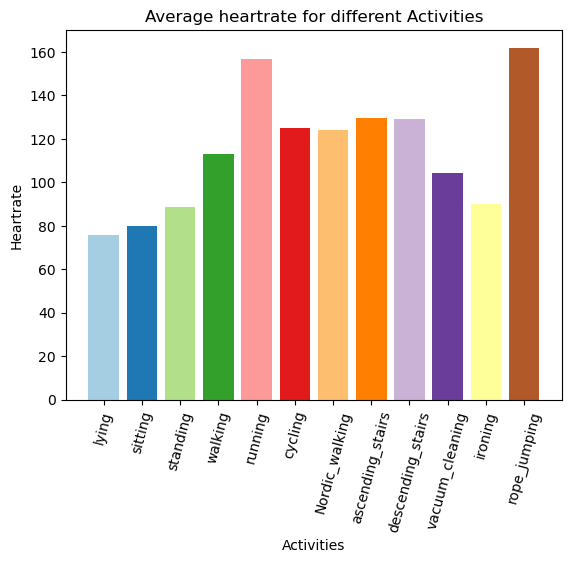

In [17]:
#plotting grpah for Heartrate for different activities
size = range(len(df_grouped))
plt.bar(df_grouped['activity_name'],df_grouped['heartrate'],color=plt.cm.Paired(size))
plt.xticks(rotation=75)
plt.xlabel('Activities')
plt.ylabel('Heartrate')
plt.title('Average heartrate for different Activities')
plt.show()

Investigating Chest_Magnetometer values and the hand temperature with different activities performed.

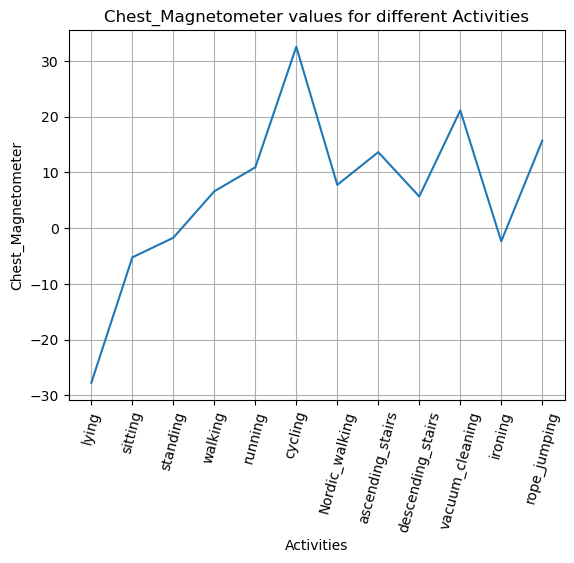

In [18]:
#plotting grpah for Chest_Magnetometer for different activities

plt.plot(df_grouped['activity_name'],df_grouped['3D_chestmagneto_3'])
plt.xticks(rotation=75)
plt.xlabel('Activities')
plt.grid()
plt.ylabel('Chest_Magnetometer')
plt.title('Chest_Magnetometer values for different Activities')
plt.show()

From the above plot, we can observe that as the efforts to do a activity increases, the chest_magnetometer value also increases.

Now, looking into the temperature of the hand, ankle and chest for all the subjects while performing each activities.

Plotting a graph that shows the variation in temperatue on hand, chest and ankle for all the subjects.

C:\Users\dell\AppData\Local\Temp\ipykernel_20340\763922064.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(df_sub_grp['subject_id'])


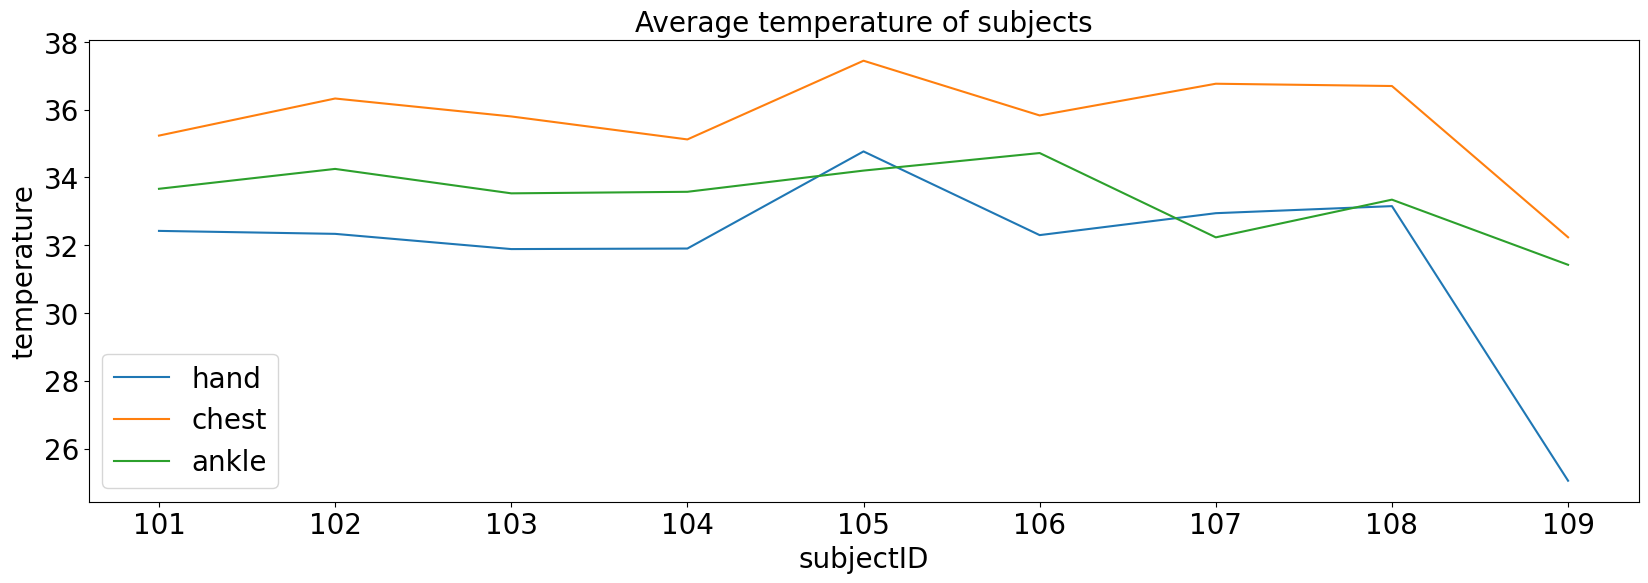

In [19]:
#plotting graph on temperature for each subjects
samepls_tempreture = pd.DataFrame()
df_sub_grp=training_dataset.groupby(['subject_id']).mean()
df_sub_grp=df_sub_grp.reset_index()
samepls_tempreture['hand'] = df_sub_grp['Temperature_hand']
samepls_tempreture['chest'] = df_sub_grp['Temperature_chest']
samepls_tempreture['ankle'] = df_sub_grp['Temperature_ankle']

ax = samepls_tempreture.plot(kind='line', figsize=(20,6), title='Avg Tempatures by Subjects',fontsize = 20)
a = ax.set_xticklabels(df_sub_grp['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls_tempreture)))
plt.xlabel('subjectID',fontsize = 20)
plt.ylabel('temperature',fontsize = 20)
plt.title('Average temperature of subjects',fontsize = 20)
plt.show()

From the above graph, we can see that the temparature of hand is showing little but more variation for each subjects than the chest and ankle.

Through the below cell we are plotting the variation in temperature for each activities.

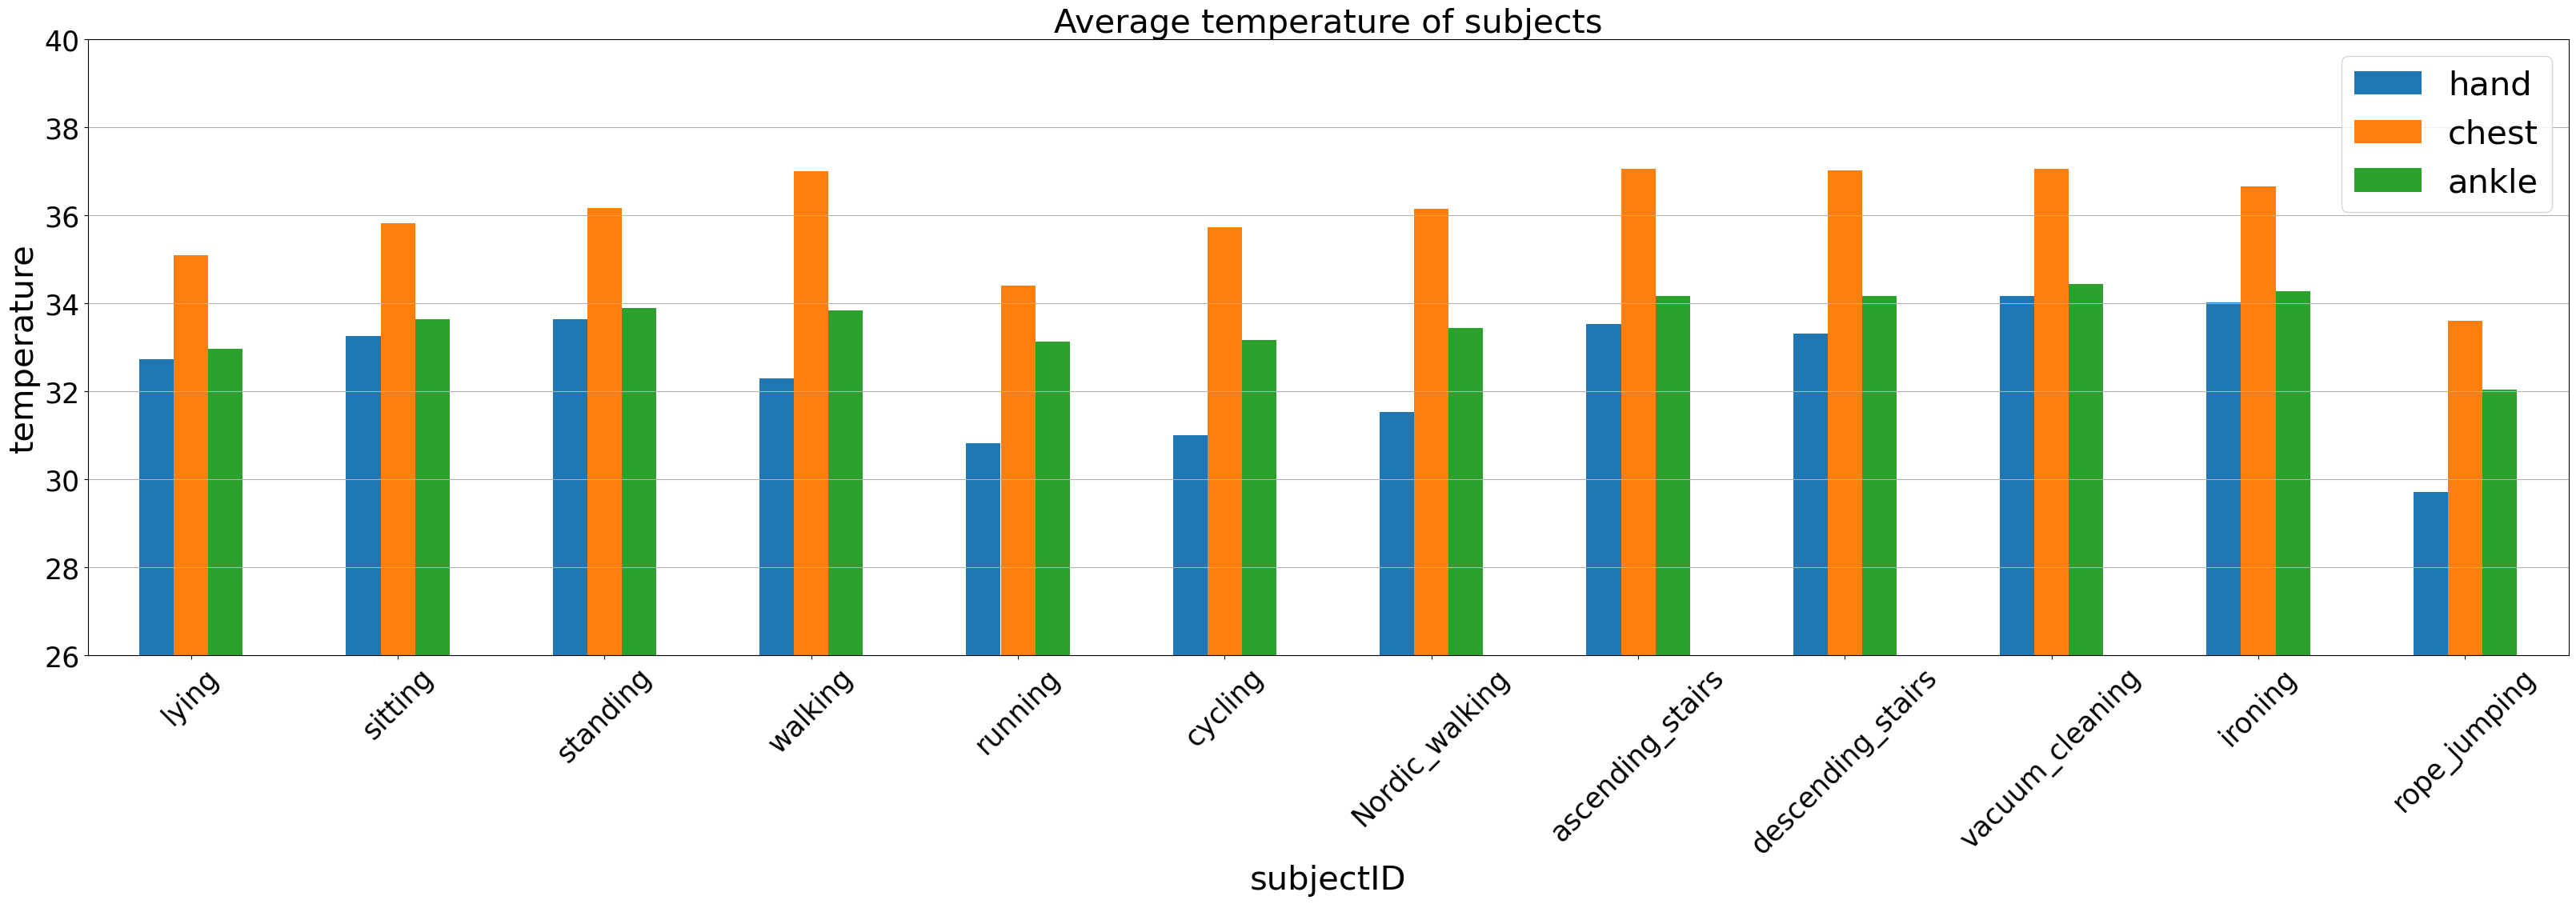

In [20]:
#plots temperature against activities
samepls_tempreture = pd.DataFrame()
samepls_tempreture['hand'] = df_grouped['Temperature_hand']
samepls_tempreture['chest'] = df_grouped['Temperature_chest']
samepls_tempreture['ankle'] = df_grouped['Temperature_ankle']

ax = samepls_tempreture.plot(kind='bar', figsize=(40,10), title='Avg Tempatures by Activity',fontsize=25)
a = ax.set_xticklabels(df_grouped['activity_name'],rotation=45)
b = ax.legend(fontsize = 30)
c = ax.set_xticks(np.arange(len(samepls_tempreture)))

plt.xlabel('subjectID',fontsize = 30)
plt.ylabel('temperature',fontsize = 30)
plt.title('Average temperature of subjects',fontsize = 30)

plt.ylim(26, 40)
plt.grid(axis='y')

plt.show()

From the above bar graph, we can observe that the temperature of hand is high for activities like lying and sitting, that has lower average heartrate, whereas the temperature of hand is recorded as low for activities like running and rope jumping, which had higher average heartrate.

#### Correlation between the variables

We are computing the correlation between two variables using Pearson’s method. i.e., the degree of linearity between two variables.

Before computing the correlation between all the attributes, I’m combining the data from the columns of 3D accelerometer, 3D gyro meter and 3D magnetometer in the dataframe to get better insights.

For that im using the below function `axis_reducer` which takes the dataframe we are working, the column names that are need to be reduced and the new column name as input, and returns the new dataframe with the newly added column.

In [21]:
#this function combines the three dimensional data into a single value
def axis_reducer(df,a,b,c,d):
    
    #making a copy of the dataFrame
    ref=df.copy()
    
    #adding a new column
    ref[d]=1
    for i in range(len(ref[a])):
        
        #implememting the formula for combining x, y and z axis values
        ref[d][i]=(ref[a][i]**2 + ref[b][i]**2 + ref[c][i]**2)**0.5

    #dropping the three columns that are used for computation
    ref=ref.drop([a,b,c], axis=1)
    
    return ref

In [22]:
#Making a copy of the Dataframe to find the correlation
df_correlation=training_dataset.copy()
df_correlation.reset_index(drop=True, inplace=True)

#displaying for reference
df_correlation.head(5)

,timestamp,activityID,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankle_Accl_6_2,3D_ankle_Accl_6_3,3D_ankleGyro_1,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,subject_id,activity_name
0,767.77,3,90.000000,34.1875,-8.52981,4.712060,0.358276,-8.254460,4.955160,0.791698,...,-1.51198,-1.00687,0.079272,-0.003718,-0.076595,-18.7246,-16.8796,36.806500,102,standing
1,1926.37,12,167.909091,33.6875,-11.23140,2.967660,2.325040,-10.353600,2.978210,2.293150,...,-1.30176,-2.51348,-0.276670,0.669698,-0.143689,-51.7218,33.8385,-6.571620,101,ascending_stairs
2,3749.31,24,181.000000,33.8125,-1.77987,3.716760,-7.388680,-0.572605,3.958700,-4.197230,...,-4.00683,2.16232,1.877290,-0.176273,-0.654045,-44.6465,-12.2168,0.272571,105,rope_jumping
3,255.84,1,62.000000,33.4375,4.89177,-0.216854,8.273420,5.134350,-0.344501,8.596710,...,-9.41168,-2.83626,-0.008012,0.002114,0.017758,-17.3221,26.4451,-4.782110,106,lying
4,491.73,2,79.000000,34.3125,-1.96494,-9.487270,0.889387,-1.802600,-9.468570,1.058310,...,2.90300,-2.15340,0.010209,0.011341,0.028921,-19.4371,15.8269,26.000300,108,sitting


In the below cell, we are combining the 3 dimensional axis data columns of Accelormeter, Gyrometer, magnetometer that are installed on hand, chest and ankle.

In [23]:
#combining the columns using the function axis_reducer()
ref=axis_reducer(df_correlation,'3D_hand_Accl_16_1','3D_hand_Accl_16_2','3D_hand_Accl_16_3','Hand_Acceleration_16')
ref=axis_reducer(ref,'3D_hand_Accl_6_1','3D_hand_Accl_6_2','3D_hand_Accl_6_3','Hand_Acceleration_6')
ref=axis_reducer(ref,'3D_handGyro_1','3D_handGyro_2','3D_handGyro_3','Hand_Gyrometer')
ref=axis_reducer(ref,'3D_ankle_Accl_6_1','3D_ankle_Accl_6_2','3D_ankle_Accl_6_3','Ankle_Acceleration_6')
ref=axis_reducer(ref,'3D_handmagneto_1','3D_handmagneto_2','3D_handmagneto_3','Hand_magnetometer')
ref=axis_reducer(ref,'3D_ankle_Accl_16_1','3D_ankle_Accl_16_2','3D_ankle_Accl_16_3','Ankle_Acceleration_16')
ref=axis_reducer(ref,'3D_ankleGyro_1','3D_ankleGyro_2','3D_ankleGyro_3','Ankle_Gyrometer')
ref=axis_reducer(ref,'3D_anklemagneto_1','3D_anklemagneto_2','3D_anklemagneto_3','Ankle_Magnetometer')
ref=axis_reducer(ref,'3D_chest_Accl_16_1','3D_chest_Accl_16_2','3D_chest_Accl_16_3','Chest_Acceleration_16')
ref=axis_reducer(ref,'3D_chest_Accl_6_1','3D_chest_Accl_6_2','3D_chest_Accl_6_3','Chest_Acceleration_6')
ref=axis_reducer(ref,'3D_chestGyro_1','3D_chestGyro_2','3D_chestGyro_3','Chest_Gyrometer')
ref=axis_reducer(ref,'3D_chestmagneto_1','3D_chestmagneto_2','3D_chestmagneto_3','Chest_Magnetometer')

#displaying the dataframe after combining the values
ref

,timestamp,activityID,heartrate,Temperature_hand,Temperature_chest,Temperature_ankle,subject_id,activity_name,Hand_Acceleration_16,Hand_Acceleration_6,Hand_Gyrometer,Ankle_Acceleration_6,Hand_magnetometer,Ankle_Acceleration_16,Ankle_Gyrometer,Ankle_Magnetometer,Chest_Acceleration_16,Chest_Acceleration_6,Chest_Gyrometer,Chest_Magnetometer
0,767.77,3,90.000000,34.1875,37.5000,34.8125,102,standing,9.751386,9.660047,0.164967,9.884888,34.928264,9.853628,0.110294,44.612218,10.060474,9.855084,0.084096,27.869222
1,1926.37,12,167.909091,33.6875,36.9375,34.9375,101,ascending_stairs,11.847243,11.014777,2.181952,11.491565,48.546151,11.880628,0.738707,62.156053,13.478711,12.883012,0.474735,43.174891
2,3749.31,24,181.000000,33.8125,36.4375,34.1250,105,rope_jumping,8.460191,5.797924,4.643583,6.151600,46.379032,7.628115,1.995762,46.288600,11.259950,7.621981,2.515189,49.537940
3,255.84,1,62.000000,33.4375,35.5625,34.6250,106,lying,9.613840,10.019164,0.062214,9.830463,48.484174,10.163821,0.019596,31.972911,9.440225,9.771592,0.034585,49.229344
4,491.73,2,79.000000,34.3125,37.6250,33.9375,108,sitting,9.729352,9.696556,0.057963,9.872713,29.258687,9.926956,0.032699,36.115194,9.970973,9.974286,0.083730,26.310660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554293,790.10,3,103.000000,33.2500,35.2500,33.9375,104,standing,9.681926,9.570878,0.172075,9.838309,37.154481,9.879611,0.029385,22.761047,9.599369,9.743544,0.103179,30.700853
1554294,1006.98,17,82.000000,33.8125,36.7500,32.8125,107,ironing,9.716372,9.720905,0.190836,9.789486,50.994092,10.072622,0.030667,58.649376,9.700690,9.712487,0.085813,39.391725
1554295,916.47,17,106.000000,34.3125,37.6250,35.0000,102,ironing,10.116408,10.457219,0.652325,9.907700,57.724228,10.013780,0.050186,58.884164,10.163825,9.918003,0.087109,70.478420
1554296,1341.72,16,100.000000,34.7500,38.2500,34.6875,108,vacuum_cleaning,13.937741,15.437760,2.845391,14.584736,48.786798,14.693504,0.809544,42.359604,11.754595,10.464803,0.920173,44.418912


Using seaborn in the next cell, we are plotting a heatmap to observe how the variables are correlated with each other and the Pearson's Correlation Co-efficient is also annotated with the graph. 

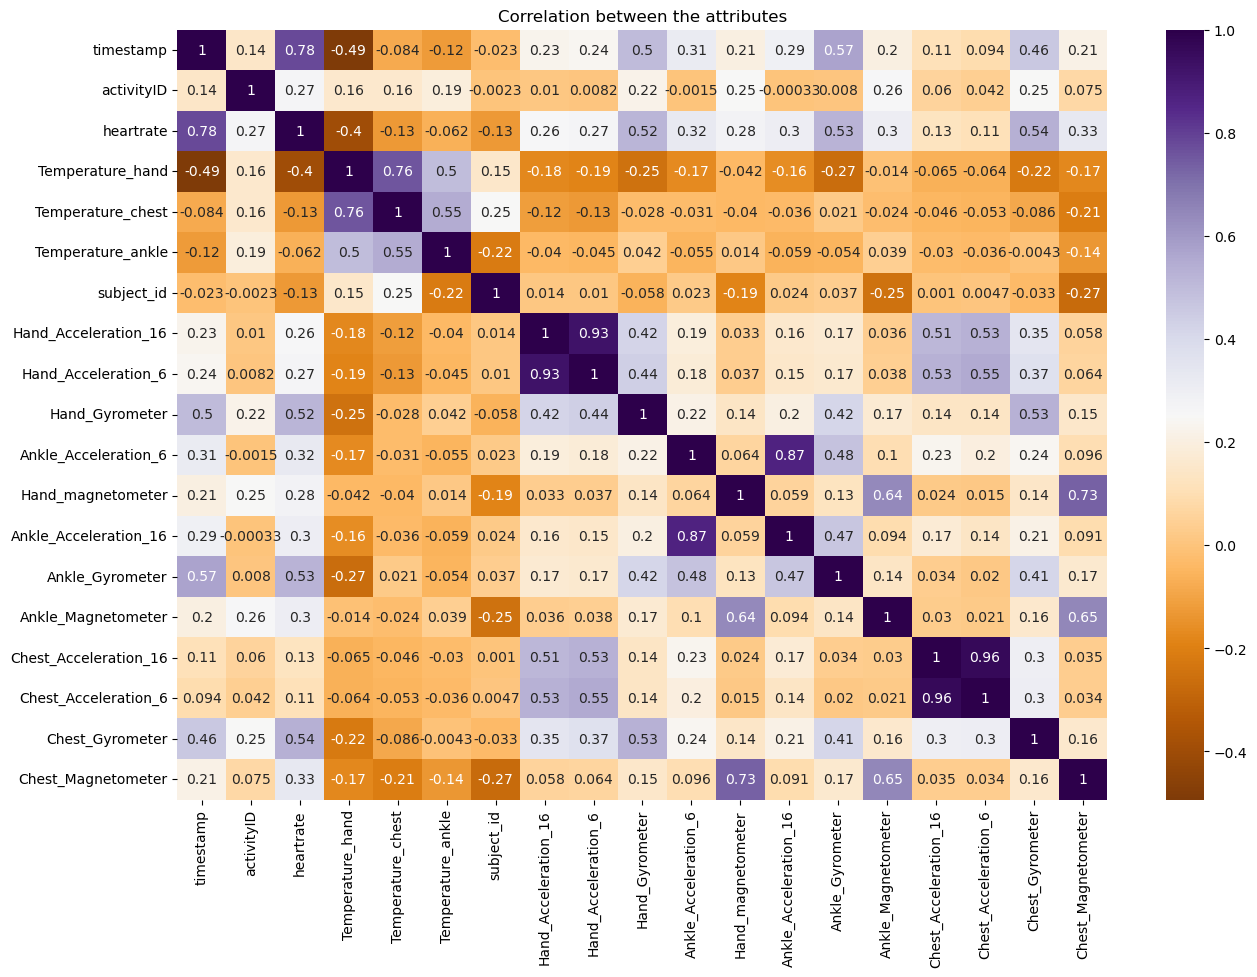

In [24]:
#using the in-built function and finding the correlation between variables.
df_corr = ref.corr(method ='pearson')

#plotting the heatmap for better visualisation
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr,cmap = "PuOr", mask=np.zeros_like(df_corr, dtype=bool),annot=True)
plt.title('Correlation between the attributes')
plt.show()

From the above heatmap, we can say that the heartrate has high negative correlation with hand temperatue and high positive correlation with the hand gyrometer.

Also, looking over the correlation between the variables without combining any columns using Spearman's method.

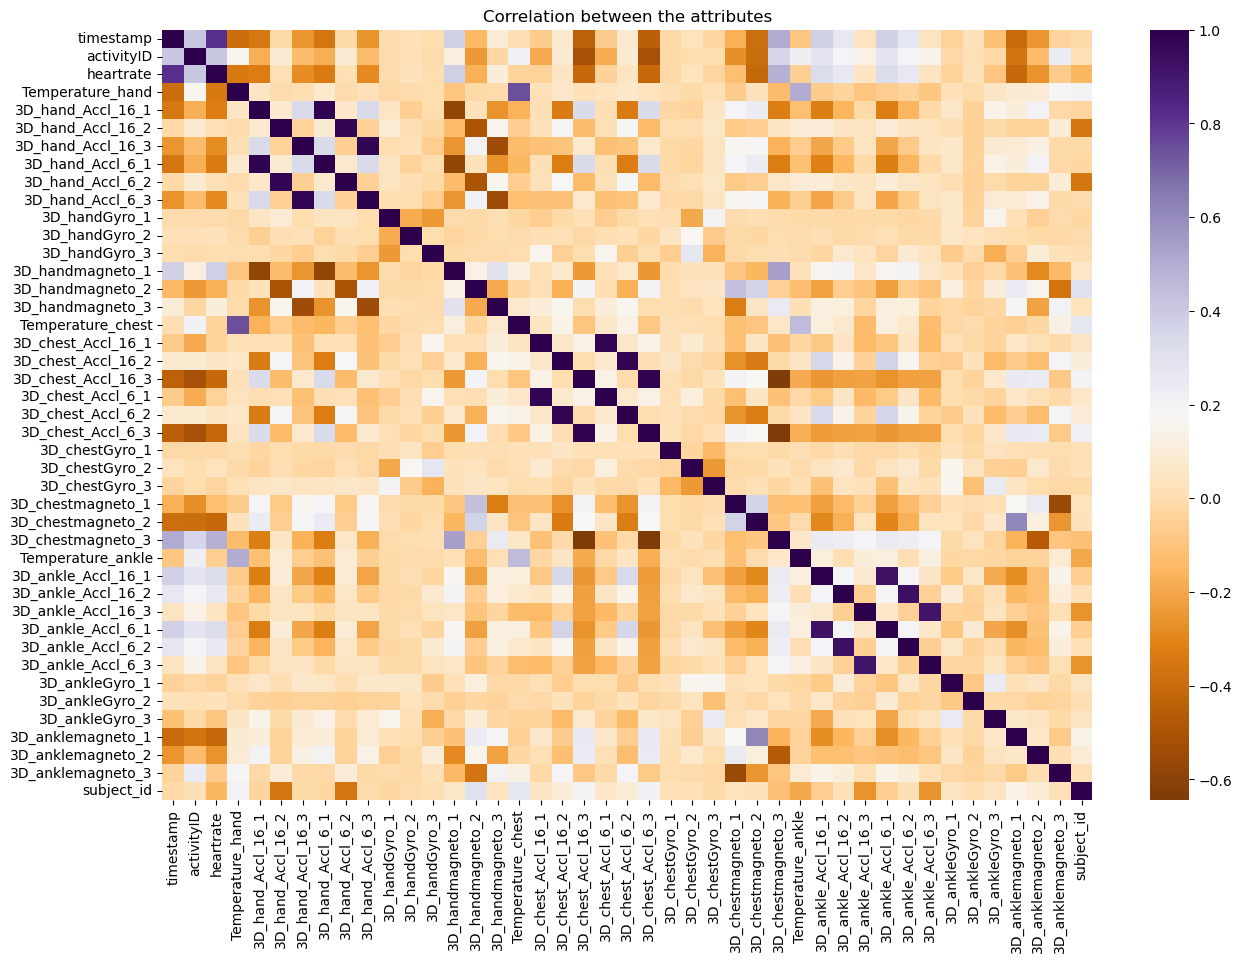

In [25]:
df_trai_cor=training_dataset.corr(method ='spearman')

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_trai_cor,cmap = "PuOr", mask=np.zeros_like(df_trai_cor, dtype=bool))
plt.title('Correlation between the attributes')
plt.show()

From this heatmap based on Spearman's rank correlation coefficient, we can observe that the activityID has high negative correlation with '3D_chest_Accl_16_2' and high positive correlation with the 'heartrate'.

### Computing the amount of physical activity performed

The below function `calorie_calc` takes the specific row as input and calculates the calories burnt based on the weight of the subject and the metabolic equivalent of the activity. This will help in finding the amount of physical activity performed.

*Calories burnt can be calculated using the formula.

    Calories = T * MET * W / (200 * 60) kcal
        T   - Time taken for the activity in seconds
        MET - Metabolic Equivalent of task per second
        W   - Weight of the subject in kg

In [26]:
#computes the calorie value
def calorie_calc(i):
    
    #computing calorie for a minute
    T=60
    
    #takes MET values from the dictionary 'MET_values'
    MET=MET_values[activity_subject_group['activityID'][i]]
    
    #takes weight of the subject from the dictionary 'subject_weights'
    W=subject_weights[activity_subject_group['subject_id'][i]]
    
    #implementing the formula
    calories= T * MET * 3.5 * W / 200
    
    return calories

In the below cells, using the function `calorie_calc` we are adding a column calorie values to the dataframe by grouping the training dataset with activityID and subjectID.

In [27]:
#grouping training datset with activityID and SubjectID and computing their respective means
activity_subject_group=training_dataset.groupby(['activityID','subject_id'])['timestamp'].agg([np.mean,max,min])
activity_subject_group=activity_subject_group.reset_index()

#adding the column calories burnt
activity_subject_group['calorie_burnt']=0
for i in range(len(activity_subject_group['activityID'])):
    activity_subject_group['calorie_burnt'][i]=calorie_calc(i)

#making few changes to the above dataframe for better visualisation
calorie_on_acti=activity_subject_group.groupby(['activityID','subject_id']).mean()
calorie_on_acti=calorie_on_acti.reset_index()
calorie_on_acti.activityID=calorie_on_acti.activityID.apply(lambda x:activityIDdict[x])

#displaying the dataframe with the column of computed calorie values
calorie_on_acti

,activityID,subject_id,mean,max,min,calorie_burnt
0,lying,101,174.146564,309.52,37.66,87.15
1,lying,102,172.450605,289.49,55.20,81.90
2,lying,103,276.922733,386.54,166.11,96.60
3,lying,104,190.206398,305.71,75.26,99.75
4,lying,105,223.122926,341.47,104.51,76.65
...,...,...,...,...,...,...
86,rope_jumping,102,4179.294009,4245.68,4113.08,737.10
87,rope_jumping,105,3714.862936,3753.52,3676.20,689.85
88,rope_jumping,106,3622.817094,3624.05,3621.50,652.05
89,rope_jumping,108,3844.272388,3888.41,3800.36,822.15


Plotting a graph for the amount of calories burnt on different physical activities performed in a given time.

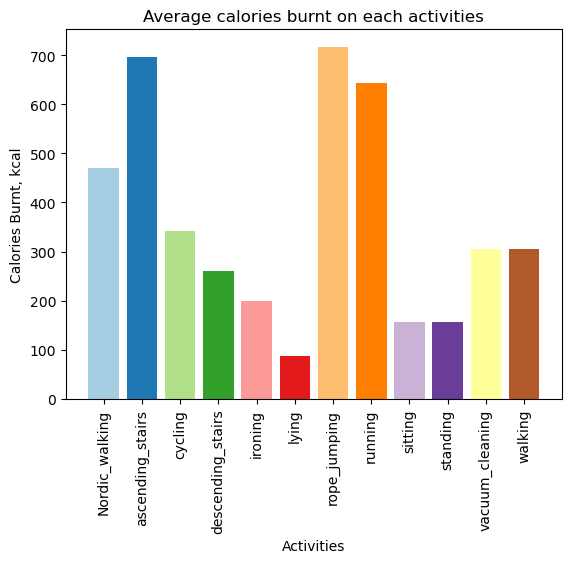

In [28]:
#altering the dataframe for better visualisation
calor_df_for_graph=calorie_on_acti.groupby(['activityID']).mean()
calor_df_for_graph.reset_index(drop=False, inplace=True)

#plotting graph for calories burnt on differnt activities
size = range(len(calorie_on_acti))
plt.bar(calor_df_for_graph['activityID'],calor_df_for_graph['calorie_burnt'],color=plt.cm.Paired(size))
plt.xticks(rotation=90)
plt.xlabel('Activities')
plt.ylabel('Calories Burnt, kcal')
plt.title('Average calories burnt on each activities')
plt.show()

## Hypothesis testing

With the above analysis we can say that the heartrate and the values of chest magnetometer has more impact on determiming the type of physical activity performed.

### Hypothesis using heartrate

Taking the heartrate first, let's say that heartrate recorded during intense activities like running are significantly more than the average heartrate.

In [29]:
print("Average Heartrate value from the dataset, µ:",round(Cleaned_Data["heartrate"].mean()))

Average Heartrate value from the dataset, µ: 107


**Testable hypothesis:**  if the activity performed is very intense then the heartrate is more likely to be greater than the average heartrate.

**Null Hypothesis H_0:** The activity performed by the subject has no significance on the heartrate recorded during the activity. ( H_0: µ<107).

**Alternate Hypothesis H_1:** The activity performed by the subject has a great significance on the heartrate recorded during the activity. (H_1:µ>107).

Storing the sample in variable `running data`

In [30]:
running_data = Cleaned_Data[Cleaned_Data["activityID"] == 5]

The below function `p_value_calc` computes the p value by taking the sample data.

In [31]:
#returns p-value by taking sample dataframe and the column name that has to be intrepreted
def p_value_calc(df,a):
    
    #computes the z-value with which p value is derived
    P_G = (df[a].mean()-Cleaned_Data[a].mean())/(df[a].std()/np.sqrt(df[a].count()))


    #if the sample size is less than 30 we use t-test
    if df[a].count() < 30 :
                                                                                                                       
        p_value_from_t=(1-stats.t.cdf(P_G,df[a].count()))
        print("Z value : ",P_G)
        print("Performing t-test")
        return p_value_from_t

    #if the sample size is large enough we use z-test
    else:
        p_value_from_normal=1-stats.norm.cdf(P_G)
        print("Z value : ",P_G)
        print("Performing z-test")
        return p_value_from_normal

In [32]:
p=p_value_calc(running_data,'heartrate')
print('The p value is',p)


Z value :  675.5728712773913
Performing z-test
The p value is 0.0


we can see that the p-value is statistically siginificant with a value of 0.00001 i.e., less than 0.05. So, we can reject the null hypothesis and accept the alternate hypothesis.

### Hypothesis using Chest magnetometer

With the attribute Chest magnetometer, we can say that the chest movement recorded during intense activities like rope jumping are significantly more than the average chest movement.

In [33]:
print("Average Chest movement value from the dataset, µ: "+str(round(Cleaned_Data["3D_chestmagneto_3"].mean()))+ " micro Tesla")

Average Chest movement value from the dataset, µ: 5 micro Tesla


**Testable hypothesis:**  if the activity performed is very intense then the chest movement is more likely to be greater than the average chest movement.

**Null Hypothesis H_0:** The activity performed by the subject has no significance on the chest movement recorded during the activity. ( H_0: µ<5).

**Alternate Hypothesis H_1:** The activity performed by the subject has a great significance on the chest movement recorded during the activity. (H_1:µ>5).

Storing the sample data in variable `rope_jumping_data`

In [34]:
rope_jumping_data = Cleaned_Data[Cleaned_Data["activityID"] == 24]

In [35]:
p=p_value_calc(rope_jumping_data,'3D_chestmagneto_3')
print('The p value is',p)

Z value :  198.16662410794612
Performing z-test
The p value is 0.0


We again got a p-value of 0.00001 which is less than 0.05 i.e., the p-value is statistically siginificant. So, we have a strong evidence to reject the null hypothesis and accept the alternate hypothesis.

## Modelling

The goal of modeling is to understand the underlying relationships and patterns in the data and make predictions or decisions based on that understanding. Although we have several different type of models here I'm using only two models. They are:

    * Polynomial Regression
    * Random Forest
    
The main objective of the model is to predict the type of physical activity performed using the multiple attributes given.

### Polynomial Regression

Polynomial regression is a type of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial. Polynomial regression can be used to fit linear as well as non-linear data.

A polynomial of degree n is defined as:

$y = c_0 + c_1x + c_2x^2 + ... c_n*x^n$ 

where c0, c1, c2, ... cn are the coefficients of the polynomial and x is the independent variable. The goal of polynomial regression is to find the values of c0, c1, c2, ... cn that minimize the difference between the predicted and actual values of the dependent variable.

The cell below stores the independent variable in `T` and dependent variable would be `T_atrribute`. we chose the attributes `heartrate` and `3D_chest_Accl_16_3` to be the independent variables because these are the ones with a very high correlation co-efficient values.

In [36]:
#loading the variables and storing it
T=training_dataset[['heartrate','3D_chest_Accl_16_3']]

#setting the target array that needs to be predicted
T_atrribute = training_dataset['activityID']  

In [37]:
from sklearn.preprocessing import PolynomialFeatures

#generates a feature matrix of all polynomial combinations with degree 7
Model_feature = PolynomialFeatures(degree=7, include_bias=False)

#Fits to the data and will return a transformed array
Model_fitting = Model_feature.fit_transform(T)
X_train, X_test, y_train, y_test = train_test_split(Model_fitting, T_atrribute, test_size=0.2,train_size=0.8,random_state=5)

In [38]:
from sklearn.linear_model import LinearRegression
# Fits the linear model
Linear_reg=LinearRegression().fit(X_train, y_train)

#predicts with linear model
predicted_y = Linear_reg.predict(X_test)

**Mean Squared Error(MSE)** measures the average squared difference between the predicted values and the actual values.

In [39]:
#computing root mean squared error
MSE_poly_reg = np.sqrt(mean_squared_error(y_test, predicted_y))
print('The root mean squared error is {}'.format(MSE_poly_reg))

#computing mean squared error
MSE_Polynomial=mean_squared_error(y_test, predicted_y)
print('Mean Squared Error : {}'.format(MSE_Polynomial))

#prints the accuracy r2_score
print('Accuracy score:',Linear_reg.score(X_train, y_train, sample_weight=None))

The root mean squared error is 4.907137571284153
Mean Squared Error : 24.079999143508537
Accuracy score: 0.36922703785795963


From the above values we can say that the polynomial regression for the given Physical Activity Monitoring dataset is very less efficient in predicting the type of physical activity performed.

### Random Forest Algorithm

Random Forest Algorithm is a method where multiple decision trees are trained on different subsets of the data, and their predictions are combined to make a final prediction. This method can improve the accuracy and stability of the model.

To get a better accuracy and classifiation, we are dropping some unwanted data from the dataset so the model need not to be trained with these data and can come up with a better predictive one that doesn't overfits with the noise.

In [40]:
#dropping the unwanted data that might create noise
data=Cleaned_Data.drop(['activityID','timestamp','subject_id'], axis=1)

#setting the target array that needs to be predicted
T_atrribute_1 = Cleaned_Data['activityID']
train_data,test_data,train_target,test_target = cross_validation.train_test_split(data,T_atrribute_1,test_size=0.2,train_size=0.8,random_state=1234)

In [41]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier_rfc=RandomForestClassifier()

#Training the model using the training sets
classifier_rfc.fit(train_data,train_target)

predict_y=classifier_rfc.predict(test_data)

In [42]:
#computes the mean squared error
MSE_random_Forest = mean_squared_error(test_target, predict_y)
print('The mean squared error for Random Forest Classifier is {}'.format(MSE_random_Forest))

The mean squared error for Random Forest Classifier is 0.012682236376503892


In [43]:
from sklearn import metrics

#calculating some metrics to evaluate the model's accuracy
acc=metrics.accuracy_score(test_target, predict_y)
print("Accuracy:",acc)
print("Error: ",(1- acc))
print("Precision value :", precision_score(test_target, predict_y,average=None).mean())
print("Recall value :", recall_score(test_target, predict_y, average=None).mean())
print("F1 Value :", f1_score(test_target, predict_y, average=None).mean())

Accuracy: 0.9998713247120891
Error:  0.00012867528791093985
Precision value : 0.9998629507983973
Recall value : 0.9998686042813459
F1 Value : 0.9998657727291117


The above values shows that the accuracy of RandomForestClassifier is comparitively high to use with Physical Activity Monitoring Dataset for predicting the type of physical activity performed.

## Summary

We have been given the Physical Activity Monitoring Dataset, which after being cleaned by removing the unwanted rows and columns and interpolating the null values, exploratory data analyses were performed where we interpreted the data using various graphical representations and tables, which helped in finding the mean and skewness of the continuous variables (heart rate, temperature, etc.) and to observe the correlation between all the attributes using Pearson’s method and the behaviour of heart rate, chest magnetometer and the calories burnt for different physical activities were investigated.

Further, in the hypothesis testing, I performed the z-test on Heart rate and chest magnetometer both resulting in a p-value less than 0.05 leading to the rejection of the null hypothesis i.e., the heart rate and chest magnetometer values had a great statistical significance by the performed physical activities. And then we built a model which predicts the type of physical activity performed using Polynomial Regression and Random Forest classifier with multiple attributes, where the latter had more accuracy than the former.
 
From the above findings, I can conclude that to Identify the level and type of physical activity a person engages in, my suggestion will be to use hardware that computes the chest movement, chest acceleration and heart rate, with software for computing the calories burnt(amount of physical activity performed) along with a model such as Random Forest Classifier for predicting the type of physical activity.


## References

1. A. Reiss and D. Stricker. Introducing a New Benchmarked Dataset for Activity
Monitoring. The 16th IEEE International Symposium on Wearable Computers
(ISWC), 2012.
2. A. Reiss and D. Stricker. Creating and Benchmarking a New Dataset for Physical
Activity Monitoring. The 5th Workshop on Affect and Behaviour Related Assistance
(ABRA), 2012.

3. scikit-learn.org. PolynomialFeatures Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform

4. scikit-learn.org. RandomForestClassifier Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

5. Anthony G Brooks 1, Simon M Gunn, Robert T Withers, Christopher J Gore, John L Plummer. Predicting walking METs and energy expenditure from speed or accelerometry. Available at: https://pubmed.ncbi.nlm.nih.gov/16015141/